In [1]:
import zipfile
from pathlib import Path

dest_dir = Path("face_data")
dest_dir.mkdir(parents=True, exist_ok=True)
zip_file_path = Path("face_data.zip")

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(dest_dir)

In [2]:
import os
for dirpath, dirnames, filenames in os.walk('data'):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 0 directories and 23708 images in 'data'.


In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
import torch
device = "cuda" if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [4]:
image_folder = Path("data")
images = os.listdir(image_folder)
print(f"Total number of images: {len(images)}")
images[:2]

Total number of images: 23708


['100_0_0_20170112213500903.jpg.chip.jpg',
 '100_0_0_20170112215240346.jpg.chip.jpg']

(-0.5, 199.5, 199.5, -0.5)

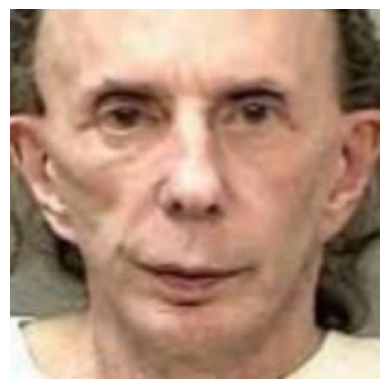

In [5]:
import random
import cv2

random_image = random.choice(images)
random_image_path = image_folder / random_image

random_image_path
random_img = cv2.imread(random_image_path)
random_img = cv2.cvtColor(random_img, cv2.COLOR_BGR2RGB)
plt.imshow(random_img)
plt.axis(False)

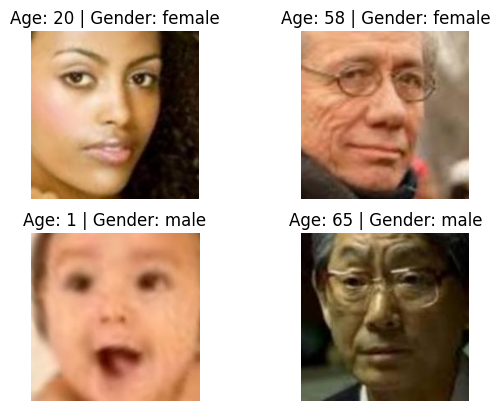

In [6]:
import random
import cv2

random_images = random.choices(images, k=4)

gender_map = {0: "male", 1: "female"}

fig, ax = plt.subplots(nrows = 2, ncols = 2)
ax = ax.ravel()
for idx, img in enumerate(random_images):
    image_path = image_folder / img
#     print(image_path)
    
    age, gender, _, _ = img.split("_")
    
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    ax[idx].set_title(f"Age: {age} | Gender: {gender_map[int(gender)]}")
    ax[idx].imshow(img)
    ax[idx].axis(False)
    

In [7]:
df = pd.DataFrame({"img_name" : images, "gender" : list(map(int, [img.split("_")[1] for img in images])), "age" : [img.split("_")[0] for img in images]})
df.head()

,img_name,gender,age
0,100_0_0_20170112213500903.jpg.chip.jpg,0,100
1,100_0_0_20170112215240346.jpg.chip.jpg,0,100
2,100_1_0_20170110183726390.jpg.chip.jpg,1,100
3,100_1_0_20170112213001988.jpg.chip.jpg,1,100
4,100_1_0_20170112213303693.jpg.chip.jpg,1,100


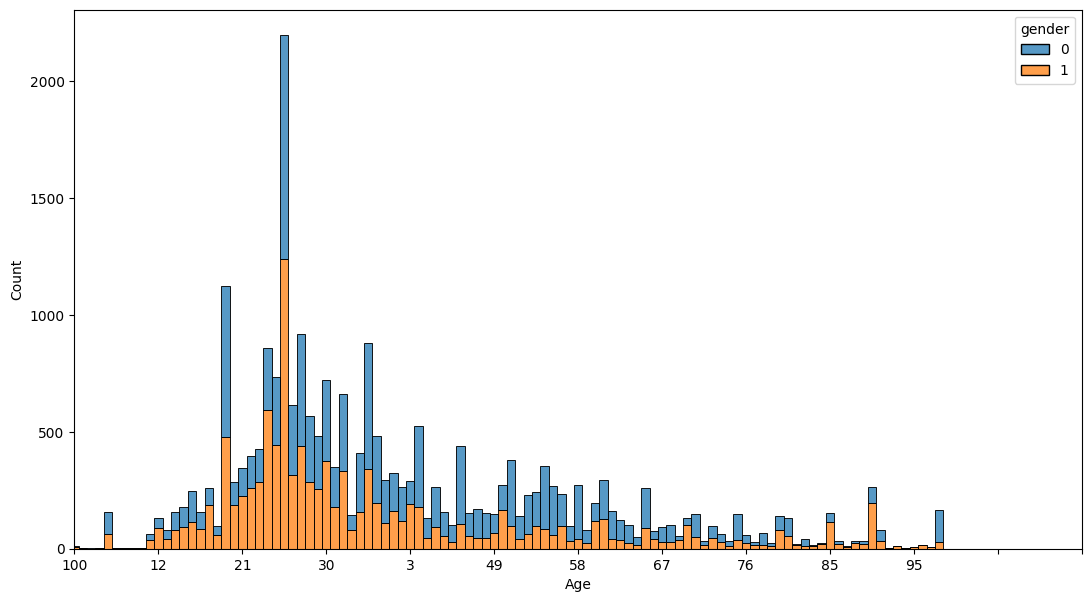

In [23]:
import seaborn as sns

plt.figure(figsize=(13, 7))
sns.histplot(data=df, x="age", hue="gender", multiple="stack", bins=100)
plt.ylabel("Count")
plt.xlabel("Age")
plt.xlim(0, 120)
plt.xticks(range(0, 121, 10))
plt.show()

In [8]:
data_folder = Path("data")

train_folder = data_folder / "train"
test_folder = data_folder / "test"

train_folder.mkdir(parents=True, exist_ok=True)
test_folder.mkdir(parents=True, exist_ok=True)

In [2]:
import zipfile
from pathlib import Path

#### from the original dataset

# # Define the folder containing the images and the output zip file path
# image_folder = Path("./archive/utkface_aligned_cropped/UTKFace")
# zip_file_path = Path("face_data.zip")

# # Create the parent directory if it doesn't exist
# image_folder.parent.mkdir(parents=True, exist_ok=True)

# # Create a zip file and add all images from the folder to it
# with zipfile.ZipFile(zip_file_path, 'w') as zipf:
#     for image_path in image_folder.glob('*.jpg'):
#         zipf.write(image_path, arcname=image_path.name)

# print(f"Created zip file at {zip_file_path}")

Created zip file at face_data.zip


In [4]:

images = list(image_folder.glob("*.jpg"))
split = int(len(images) * 0.8)
train_images = random.sample(images, k=split)
test_images = [img for img in images if img not in train_images]

len(train_images), len(test_images)

grnder = train_images[124].stem.split("_")[1]
grnder

'0'

In [10]:
train_images[0].stem + ".jpg"

'18_1_0_20170109214725387.jpg.chip.jpg'

In [15]:
from pathlib import Path
import shutil
import pandas as pd
import random

# Assuming df is already defined with the data
data_folder = Path("data")

image_folder = Path(".\\archive\\utkface_aligned_cropped\\UTKFace")  
if not image_folder.is_dir():
    image_folder = Path("face_data")

gender_map = {0: "male", 1: "female"} 

train_folder = data_folder / "train"
test_folder = data_folder / "test"

# Create the train and test directories if they do not exist
train_folder.mkdir(parents=True, exist_ok=True)
test_folder.mkdir(parents=True, exist_ok=True)


# Function to copy images to their respective folders
def copy_images(data, folder):
    for img in data:
        gender = img.stem.split("_")[1]
        image_path = image_folder / str(img.stem + ".jpg")
        dest_dir = folder / gender_map[int(gender)]
        
        # print(f"{image_path}\n, {dest_dir}\n, {image_dir}\n")
        # break
        dest_dir.mkdir(parents=True, exist_ok=True)  # Create the directory if it doesn't exist
        # if not image_dir.is_dir():
        image_dest = dest_dir / img.name
        # print(image_path)
        # print(image_path.is_file(), image_dest.is_file())
        # break
        shutil.copy2(image_path, image_dest)  # Copy the image to the destination

# Copy train and test images
copy_images(train_images, train_folder)
copy_images(test_images, test_folder)

print("Images have been copied successfully.")


Images have been copied successfully.


In [13]:
from pathlib import Path
image_folder = Path(".\\archive\\utkface_aligned_cropped\\UTKFace")  
images = list(image_folder.glob("*.jpg"))

import random
split = int(len(images) * 0.8)
train_images = random.sample(images, k=split)
test_images = [img for img in images if img not in train_images]

print(f"Number of train images: {len(train_images)}\nNumber of test images: {len(test_images)}")

(18966, 4742)

In [10]:
import os

def walk_through_data(dir_path):
    for dirpath, dirname, filenames in os.walk(dir_path):
        print(f"there are {len(dirname)} directories ({dirname}) and {len(filenames)} images in {dirpath}.")


working_dir = "data"
walk_through_data(working_dir)

there are 2 directories (['test', 'train']) and 0 images in data.
there are 2 directories (['female', 'male']) and 0 images in data\test.
there are 0 directories ([]) and 1986 images in data\test\female.
there are 0 directories ([]) and 2756 images in data\test\male.
there are 2 directories (['female', 'male']) and 0 images in data\train.
there are 0 directories ([]) and 9331 images in data\train\female.
there are 0 directories ([]) and 9635 images in data\train\male.


In [11]:
data_folder

train_dir = data_folder / "train"
test_dir = data_folder / "test"

train_dir, test_dir

(WindowsPath('data/train'), WindowsPath('data/test'))